# Connect to Database

In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import yellowbrick as yb

from yellowbrick.features import RadViz
from sklearn.metrics import accuracy_score
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50)       

Filter for year 2013 and Social Sciences Module Domain in the data

In [4]:
df = df.loc[(df.year == 0)&(df.module_domain==0)]

In [5]:
list(df)

['index',
 'Scotland',
 'East Anglian Region',
 'London Region',
 'South Region',
 'North Western Region',
 'West Midlands Region',
 'South West Region',
 'East Midlands Region',
 'South East Region',
 'Wales',
 'Yorkshire Region',
 'North Region',
 'Ireland',
 'id_student',
 'code_module',
 'module_domain',
 'module_presentation_length',
 'term',
 'year',
 'num_of_prev_attempts',
 'final_result',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'region',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'qtr_sum_clicks',
 'half_sum_clicks',
 'threeqtr_sum_clicks',
 'qtr_half_sum_clicks',
 'half_threeqtr_sum_clicks',
 'thrd_sum_clicks',
 'twothrd_sum_clicks',
 'thrd_twothrd_sum_clicks',
 'allclicks',
 'std_half_score']

# Feature Analysis

In [6]:
df = df[['Scotland',
         'East Anglian Region',
         'London Region',
         'South Region',
         'North Western Region',
         'West Midlands Region',
         'South West Region',
         'East Midlands Region',
         'South East Region',
         'Wales',
         'Yorkshire Region',
         'North Region',
         'Ireland',
         'code_module', 
         'module_domain', 
         'module_presentation_length',
         'term', 
         'num_of_prev_attempts',
         'final_result', 
         'date_registration', 
         'disability', 
         'gender', 
         'age_band',  
         'highest_education', 
         'imd_band', 
         'studied_credits', 
         'b4_sum_clicks', 
         'half_sum_clicks', 
         'std_half_score'
        ]]

In [7]:
feature_list = df

In [8]:
#remove null values
#feature_list = feature_list.dropna()

In [9]:
feature_list.head()

,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,code_module,module_domain,module_presentation_length,term,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,268,0,0,1,-159.0,0,0,2,3,9.0,240,98.0,612.0,0.816000
5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,240,1,2,0,-47.0,0,1,0,1,2.0,60,14.0,147.0,0.388140
6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,268,0,0,0,-194.0,0,1,0,2,4.0,60,0.0,0.0,0.000000
8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,268,0,0,1,-27.0,0,0,0,2,5.0,60,6.0,365.0,0.896129
12,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,240,1,0,1,-73.0,0,1,0,1,2.0,120,5.0,1465.0,0.630000


In [10]:
#feature_list = df.loc[(df.year == 0)&(df.module_domain==1)]

In [11]:
#filter module domain and term
#feature_list = feature_list[feature_list.columns.drop(['module_domain','term'])]

In [12]:
feature_list.head()

,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,code_module,module_domain,module_presentation_length,term,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,268,0,0,1,-159.0,0,0,2,3,9.0,240,98.0,612.0,0.816000
5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,240,1,2,0,-47.0,0,1,0,1,2.0,60,14.0,147.0,0.388140
6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,268,0,0,0,-194.0,0,1,0,2,4.0,60,0.0,0.0,0.000000
8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,268,0,0,1,-27.0,0,0,0,2,5.0,60,6.0,365.0,0.896129
12,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,240,1,0,1,-73.0,0,1,0,1,2.0,120,5.0,1465.0,0.630000


# Feature Selection

Shapiro Feature Ranking

//anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


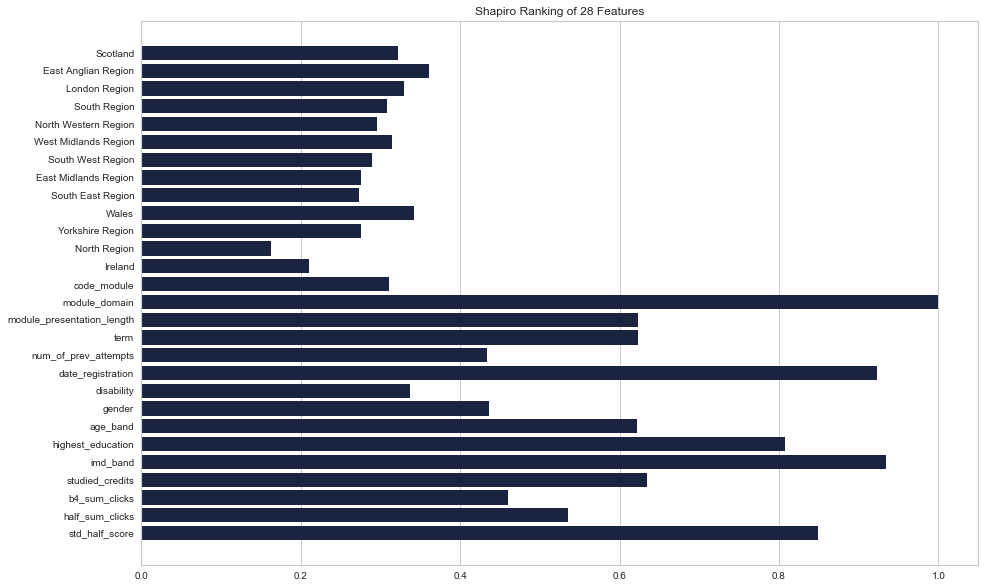

In [13]:
sns.set_palette("cubehelix")

X = feature_list[feature_list.columns.drop(['final_result'])]

y = feature_list['final_result']

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro',size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

RandomForest Classifier Feature Ranking

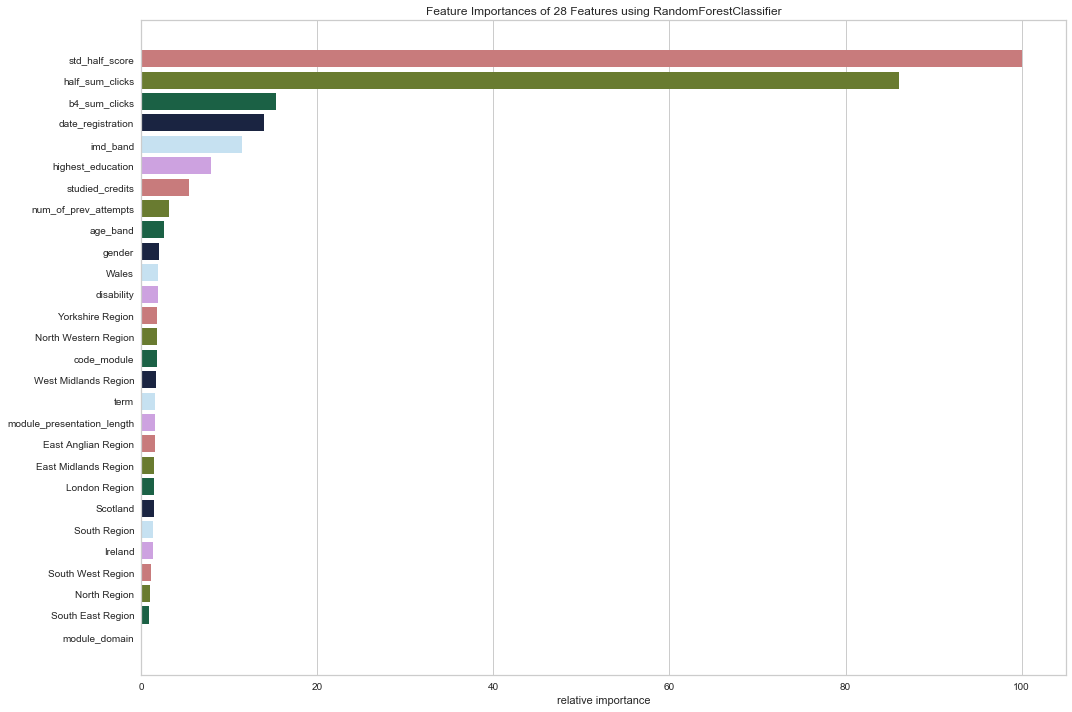

In [14]:
model = RandomForestClassifier(n_estimators=10)
feature_list = FeatureImportances(model, size=(1080, 720))
feature_list.fit(X, y)

feature_list.show()

LogisticRegression Feature Ranking

//anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


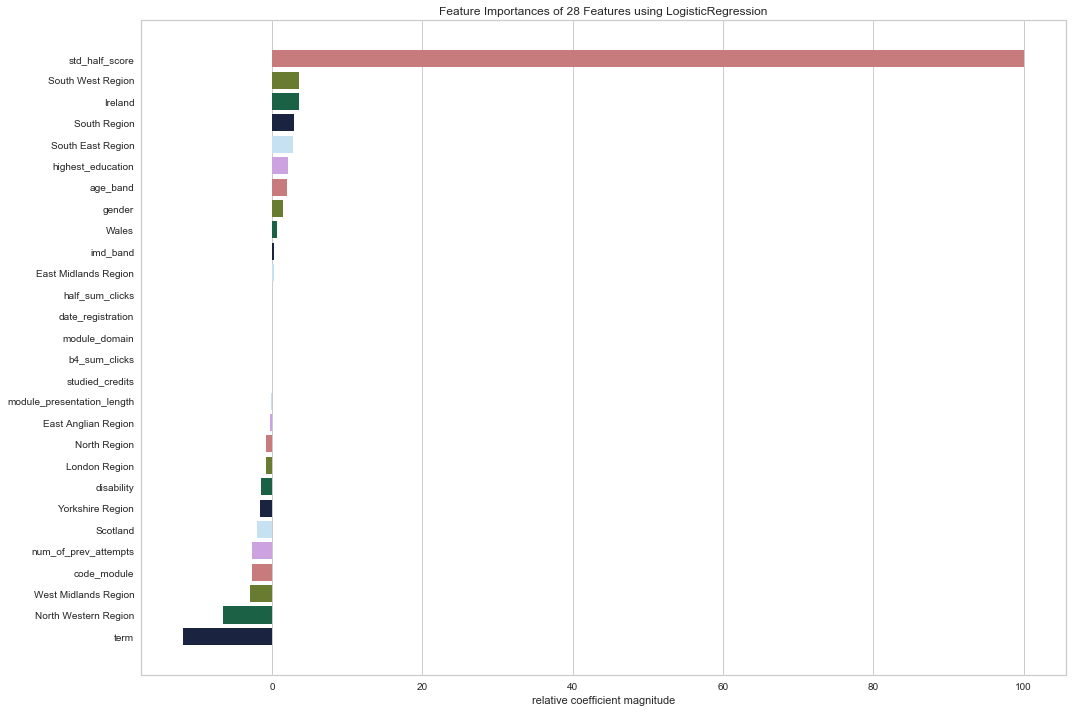

In [15]:
model = LogisticRegression()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)

viz.show()

DecisionTreeClassifier Feature Ranking

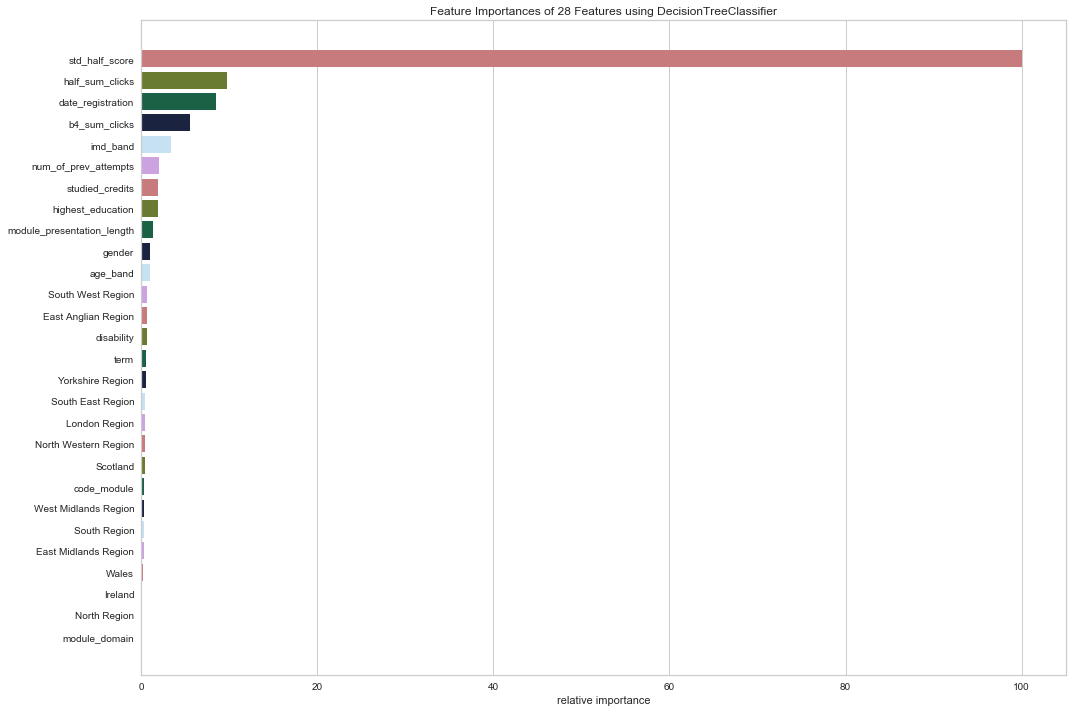

In [16]:
model = DecisionTreeClassifier()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
viz.show()

In [17]:
feature_list = RandomForestClassifier()
feature_list.fit(X, y)
predictions = feature_list.predict(X)
    
accuracy_score(y, predictions)

0.9923822714681441

GradientBoostingClassifier Feature Ranking

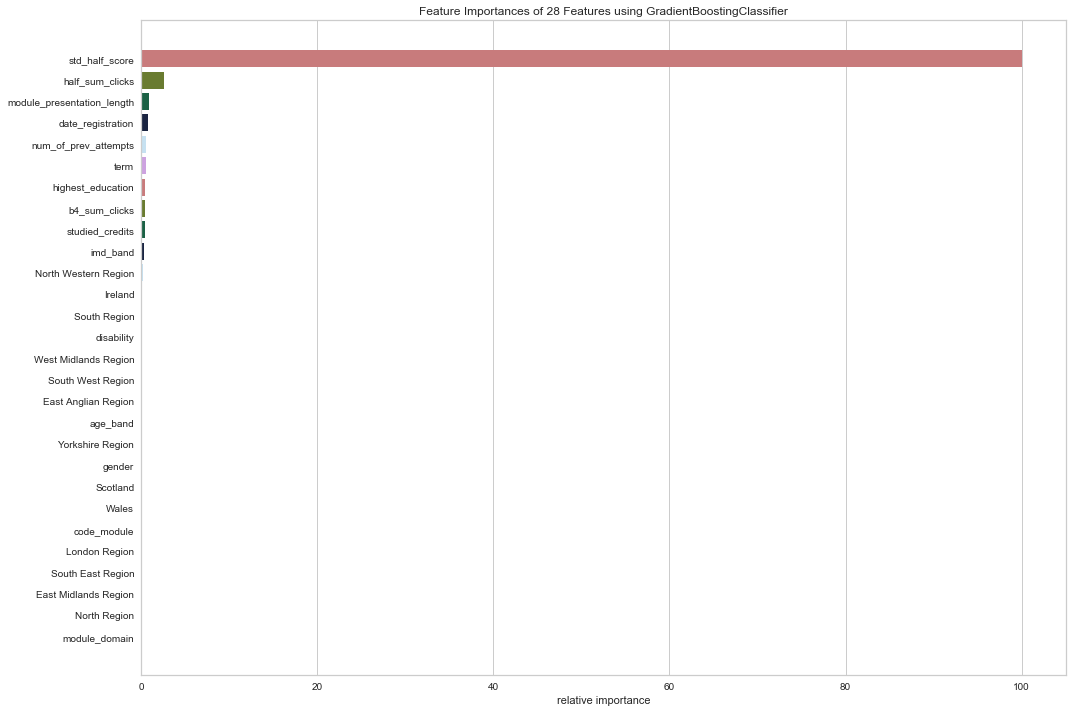

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
viz = FeatureImportances(model, size=(1080, 720))
viz.fit(X, y)
viz.show()

SVM Feature Ranking

//anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


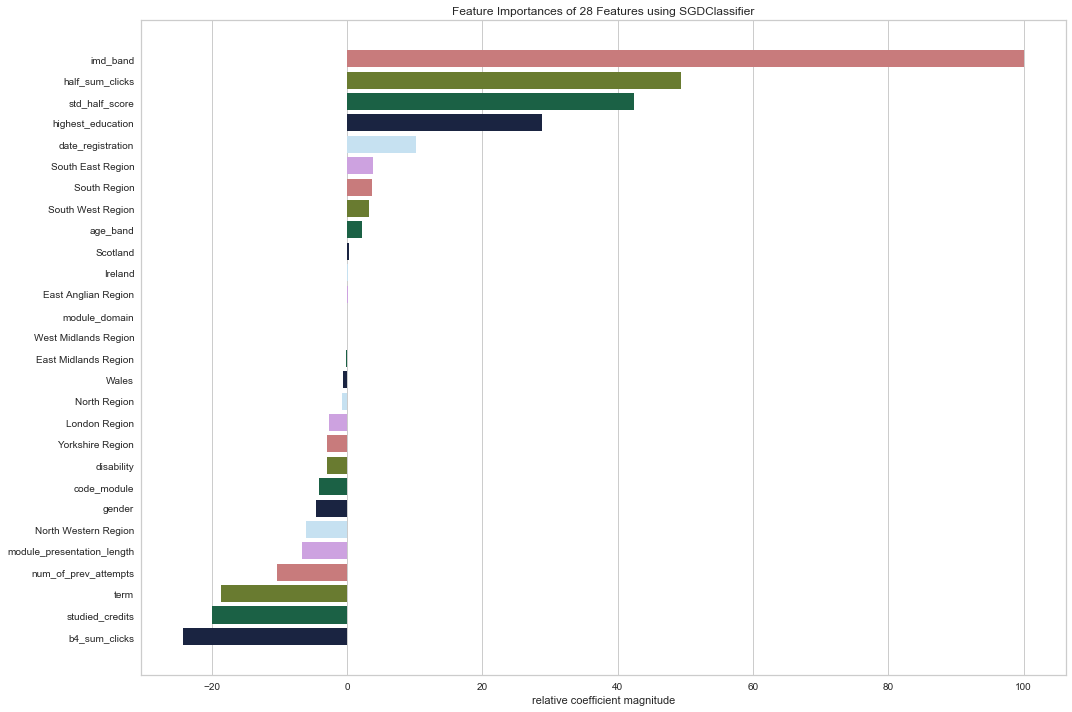

In [19]:
from sklearn import linear_model
model = linear_model.SGDClassifier()
viz = FeatureImportances(model, size=(1080, 720))
viz.fit(X, y)
viz.show()

Lasso Feature Ranking

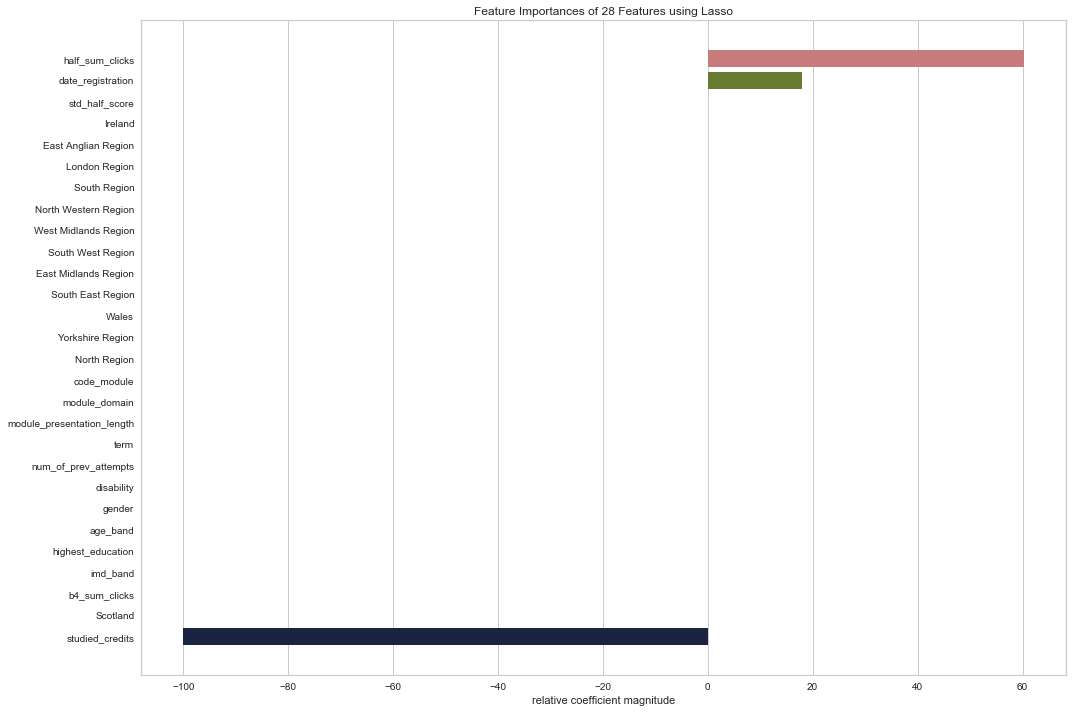

In [20]:
model = Lasso()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
viz.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


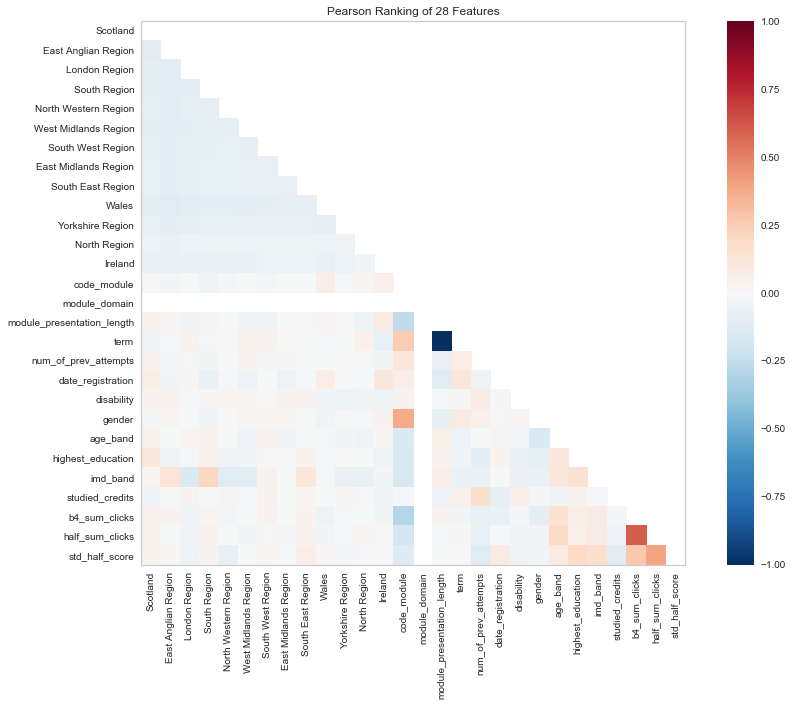

In [21]:
#pearson correlation chart
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson',  size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

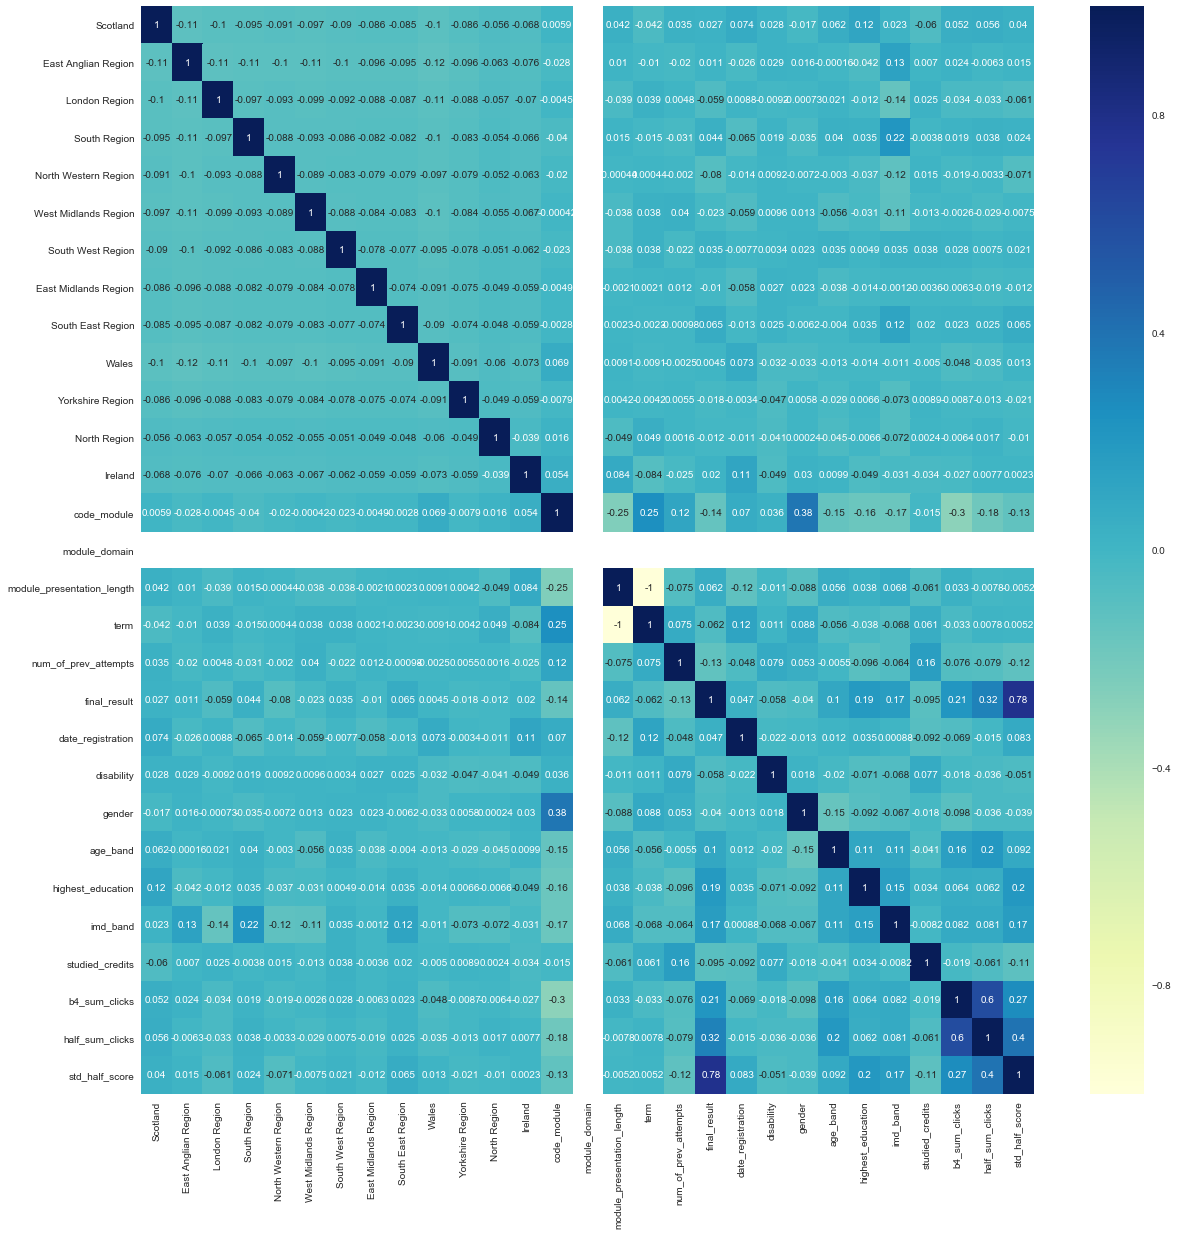

In [22]:
#seaborn correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

# Regularization Techniques

In [23]:
features = X
labels   = y

In [24]:
list(features)

['Scotland',
 'East Anglian Region',
 'London Region',
 'South Region',
 'North Western Region',
 'West Midlands Region',
 'South West Region',
 'East Midlands Region',
 'South East Region',
 'Wales',
 'Yorkshire Region',
 'North Region',
 'Ireland',
 'code_module',
 'module_domain',
 'module_presentation_length',
 'term',
 'num_of_prev_attempts',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'half_sum_clicks',
 'std_half_score']

In [25]:
model = LinearRegression()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', -0.014096301281413636), ('East Anglian Region', -0.0056856594122698355), ('London Region', -0.013357491384518805), ('South Region', 0.02616013004442285), ('North Western Region', -0.04394176819046543), ('West Midlands Region', -0.0199707959033576), ('South West Region', 0.03150619958988614), ('East Midlands Region', -0.0013584687886448595), ('South East Region', 0.020320725101447015), ('Wales', -0.007531852168954671), ('Yorkshire Region', -0.0053596942537231474), ('North Region', -0.0016585370405406195), ('Ireland', 0.034973513688140376), ('code_module', -0.03611270448812001), ('module_domain', -1.3877787807814457e-17), ('module_presentation_length', 0.0019733597673574975), ('term', -7.047713454842665e-05), ('num_of_prev_attempts', -0.023325860375046276), ('date_registration', -0.00013802713851822216), ('disability', -0.01987199726078414), ('gender', 0.011417537457737484), ('age_band', 0.019268941266533033), ('highest_education', 0.0185333934022227), ('imd_band', 0.003189

In [26]:
model = Lasso()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', 0.0), ('East Anglian Region', 0.0), ('London Region', -0.0), ('South Region', 0.0), ('North Western Region', -0.0), ('West Midlands Region', -0.0), ('South West Region', 0.0), ('East Midlands Region', -0.0), ('South East Region', 0.0), ('Wales', 0.0), ('Yorkshire Region', -0.0), ('North Region', -0.0), ('Ireland', 0.0), ('code_module', -0.0), ('module_domain', 0.0), ('module_presentation_length', 0.0), ('term', -0.0), ('num_of_prev_attempts', -0.0), ('date_registration', 5.8231288151083525e-05), ('disability', -0.0), ('gender', -0.0), ('age_band', 0.0), ('highest_education', 0.0), ('imd_band', 0.0), ('studied_credits', -0.0003257968652531208), ('b4_sum_clicks', 0.0), ('half_sum_clicks', 0.00019611154759001801), ('std_half_score', 0.0)]


In [27]:
model = Ridge()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', -0.014082265445318634), ('East Anglian Region', -0.005639014495191385), ('London Region', -0.013407379905612119), ('South Region', 0.026037372848991706), ('North Western Region', -0.043972603574555964), ('West Midlands Region', -0.019824486751195233), ('South West Region', 0.031478117661005334), ('East Midlands Region', -0.0013420511165894008), ('South East Region', 0.02041367685617043), ('Wales', -0.007429722895988181), ('Yorkshire Region', -0.0053602690659365695), ('North Region', -0.0016774349998309984), ('Ireland', 0.034806060883614175), ('code_module', -0.036060748801879546), ('module_domain', 0.0), ('module_presentation_length', 0.0019725499948493822), ('term', -7.044821378747031e-05), ('num_of_prev_attempts', -0.023421805046991474), ('date_registration', -0.0001362532740522095), ('disability', -0.01985500399707669), ('gender', 0.011376562609282501), ('age_band', 0.01922049495253243), ('highest_education', 0.018755298446134477), ('imd_band', 0.0032334231692493823), 

In [28]:
model = ElasticNet()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', 0.0), ('East Anglian Region', 0.0), ('London Region', -0.0), ('South Region', 0.0), ('North Western Region', -0.0), ('West Midlands Region', -0.0), ('South West Region', 0.0), ('East Midlands Region', -0.0), ('South East Region', 0.0), ('Wales', 0.0), ('Yorkshire Region', -0.0), ('North Region', -0.0), ('Ireland', 0.0), ('code_module', -0.0), ('module_domain', 0.0), ('module_presentation_length', 0.0), ('term', -0.0), ('num_of_prev_attempts', -0.0), ('date_registration', 0.0002857722840448826), ('disability', -0.0), ('gender', -0.0), ('age_band', 0.0), ('highest_education', 0.0), ('imd_band', 0.0), ('studied_credits', -0.0005866138815466771), ('b4_sum_clicks', 0.00010210296042605428), ('half_sum_clicks', 0.00018957077040338618), ('std_half_score', 0.0)]


In [29]:
model = LogisticRegression()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', [-0.17600134308837567, -0.029179464216642234, -0.07244359955501, 0.2588964409503545, -0.565004267806653, -0.2605049074262385, 0.3109304260502925, 0.01811306182083387, 0.24724264032221288, 0.060950888802081306, -0.14207098274248342, -0.06959586416629797, 0.310735596887282, -0.23407239495984272, 0.0, -0.01741476871732287, -1.0324354824453061, -0.23059752480565932, 6.078236902011122e-05, -0.1234655886954247, 0.12346211274123026, 0.1713778053101128, 0.18720588665180973, 0.026194519785496403, -0.0009496374888573935, -0.000930155638099048, 0.00021093505678293248, 8.750029373347877])]


In [30]:
model = linear_model.SGDClassifier()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('Scotland', [2.6479544551833003, 14.563749503508447, -45.89787722317814, 42.36727128293377, -72.37742177501148, 2.206628712652781, 15.005075246039011, -10.59181782073342, 49.42848316342264, 5.295908910366732, -15.446400988569568, -20.742309898936295, 7.061211880488958, -63.99223266693094, 0.0, -880.8861820909964, -221.98684849287127, -124.89518513614841, 143.43086632243194, -37.512688115097475, -47.22185445076999, 14.122423760977892, 296.1295732380107, 1016.8145107904102, -895.8912573370374, 360.56313164746666, 1326.6251820468572, 497.96758603128615])]


# Transformer Techniques

In [31]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['date_registration', 'studied_credits', 'half_sum_clicks']


In [32]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['std_half_score']


In [33]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['date_registration', 'studied_credits', 'b4_sum_clicks', 'half_sum_clicks']


In [34]:
model = RandomForestClassifier()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['date_registration', 'imd_band', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score']


In [35]:
model = DecisionTreeClassifier()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['date_registration', 'b4_sum_clicks', 'half_sum_clicks', 'std_half_score']


In [36]:
model = linear_model.SGDClassifier()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['module_presentation_length', 'term', 'num_of_prev_attempts', 'date_registration', 'highest_education', 'imd_band', 'studied_credits', 'half_sum_clicks', 'std_half_score']


In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport
import os
import json 
import time
import pickle
import pandas as pd 
import seaborn as sns

from sklearn.datasets.base import Bunch
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.exceptions import NotFittedError
from sklearn import metrics


from sklearn.model_selection import StratifiedKFold #ensure allows for randomization
from sklearn.model_selection import train_test_split as tts #drop this if using KFold
from sklearn import preprocessing
from sklearn.model_selection import validation_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Model Evaluation

We borrowed some of our code to write our "scores" to a list from Loan Canoe (Cohort 15) and would like to credit them below. Here's the link to their orginal Github code:
https://github.com/georgetown-analytics/Loan-Canoe/blob/master/notebooks/03e_Phase_2_Models_TN_yr2013%2009042019_tn.ipynb

In [38]:
scores = {'model':[],'precision':[], 'precision_1':[], 'precision_0':[], 'recall':[], 'recall_1':[], 'recall_0':[], 'accuracy':[], 'f1':[],  'f1_1':[],  'f1_0':[]}

In [39]:
train = df
lr = LogisticRegression(random_state=1)

X = train[['Scotland',
            'East Anglian Region',
            'London Region',
            'South Region',
            'North Western Region',
            'West Midlands Region',
            'South West Region',
            'East Midlands Region',
            'South East Region',
            'Wales',
            'Yorkshire Region',
            'North Region',
            'Ireland', 
            'module_presentation_length',
            'date_registration', 
            'disability', 
            'gender', 
            'age_band',
            'highest_education', 
            'imd_band', 
            'studied_credits', 
            'b4_sum_clicks', 
            'half_sum_clicks']]
y = train['final_result']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
log_reg = lr.fit(X_train, y_train)

In [40]:
#test out Naive Bayes Model
models = [GaussianNB()]

def gaussian_score_model(X_train, y_train, estimator):

    y_train = LabelEncoder().fit_transform(y_train)
    model = GaussianNB()

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_train
    predicted = model.predict(X_train)
    cr = classification_report(y_train, predicted, output_dict=True)

    # Compute and return scores
    model_name = str(model).split("(")[0]
    scores['model'].append(model_name)
    scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
    scores['precision_1'].append(cr['1']['precision'])
    scores['precision_0'].append(cr['0']['precision'])
    scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
    scores['recall_1'].append(cr['1']['recall'])
    scores['recall_0'].append(cr['0']['recall'])
    scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
    scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))
    scores['f1_1'].append(cr['1']['f1-score'])
    scores['f1_0'].append(cr['0']['f1-score'])

for model in models:
    gaussian_score_model(X_test, y_test, model)

print(scores)

{'model': ['GaussianNB'], 'precision': [0.6589240245250234], 'precision_1': [0.6802325581395349], 'precision_0': [0.638623326959847], 'recall': [0.6551326412918108], 'recall_1': [0.5531914893617021], 'recall_0': [0.7522522522522522], 'accuracy': [0.6551326412918108], 'f1': [0.6514593332964183], 'f1_1': [0.6101694915254238], 'f1_0': [0.6907962771458117]}


In [41]:
#test out GradientBoostingClassifier
models = [GradientBoostingClassifier()]

def gxb_score_model(X_train, y_train, estimator):

    y_train = LabelEncoder().fit_transform(y_train)
    model = GradientBoostingClassifier()

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_train
    predicted = model.predict(X_train)
    cr = classification_report(y_train, predicted, output_dict=True)

    # Compute and return scores
    model_name = str(model).split("(")[0]
    scores['model'].append(model_name)
    scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
    scores['precision_1'].append(cr['1']['precision'])
    scores['precision_0'].append(cr['0']['precision'])
    scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
    scores['recall_1'].append(cr['1']['recall'])
    scores['recall_0'].append(cr['0']['recall'])
    scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
    scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))
    scores['f1_1'].append(cr['1']['f1-score'])
    scores['f1_0'].append(cr['0']['f1-score'])

for model in models:
    gxb_score_model(X_test, y_test, model)

# print(scores)

In [42]:
#loop through other models
models = [SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=4),
    RandomForestClassifier(n_estimators=4)]

In [43]:
def score_model(X_train, y_train, estimator, **kwargs):
    """
    Test various estimators.
    """
    y_train = LabelEncoder().fit_transform(y_train)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder(categories = 'auto')),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs)

    expected  = y_train
    predicted = model.predict(X_train)
    cr = classification_report(y_test, predicted, output_dict=True)

    # Compute and return scores
    model_name = str(estimator).split("(")[0]
    scores['model'].append(model_name)
    scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
    scores['precision_1'].append(cr['1']['precision'])
    scores['precision_0'].append(cr['0']['precision'])
    scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
    scores['recall_1'].append(cr['1']['recall'])
    scores['recall_0'].append(cr['0']['recall'])
    scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
    scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))
    scores['f1_1'].append(cr['1']['f1-score'])
    scores['f1_0'].append(cr['0']['f1-score'])

In [44]:
#test and score models in loop
for model in models:
    score_model(X_test, y_test, model)

In [45]:
print(scores)

{'model': ['GaussianNB', 'GradientBoostingClassifier', 'SVC', 'NuSVC', 'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'LogisticRegressionCV', 'BaggingClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier'], 'precision': [0.6589240245250234, 0.8961931586478498, 0.7030638565586662, 0.9306654409758236, 0.996542243037804, 0.9896214040162289, 0.7856253180254439, 0.9250227513144128, 0.863215573747433, 0.9896445736538194, 1.0, 0.9478399682846378], 'precision_1': [0.6802325581395349, 0.8459915611814346, 0.7672727272727272, 0.8984547461368654, 0.9976303317535545, 0.990521327014218, 0.8209366391184573, 0.8920704845814978, 0.8008130081300813, 0.9859154929577465, 1.0, 0.967741935483871], 'precision_0': [0.638623326959847, 0.9440203562340967, 0.6418918918918919, 0.961352657004831, 0.9955056179775281, 0.9887640449438202, 0.751984126984127, 0.9564164648910412, 0.9226666666666666, 0.9931972789115646, 1.0, 0.9288793103448276], 'recall': [0.6551326412918108, 0.8904267

In [46]:
#convert dictionary to dataframe
model_eval = pd.DataFrame.from_dict(scores, orient='columns', dtype=None)

In [47]:
#check out data
model_eval.head(10)

,model,precision,precision_1,precision_0,recall,recall_1,recall_0,accuracy,f1,f1_1,f1_0
0,GaussianNB,0.658924,0.680233,0.638623,0.655133,0.553191,0.752252,0.655133,0.651459,0.610169,0.690796
1,GradientBoostingClassifier,0.896193,0.845992,0.944020,0.890427,0.947991,0.835586,0.890427,0.890203,0.894091,0.886499
2,SVC,0.703064,0.767273,0.641892,0.681661,0.498818,0.855856,0.681661,0.670650,0.604585,0.733591
3,NuSVC,0.930665,0.898455,0.961353,0.928489,0.962175,0.896396,0.928489,0.928463,0.929224,0.927739
4,LinearSVC,0.996542,0.997630,0.995506,0.996540,0.995272,0.997748,0.996540,0.996540,0.996450,0.996625
5,SGDClassifier,0.989621,0.990521,0.988764,0.989619,0.988180,0.990991,0.989619,0.989619,0.989349,0.989876
6,KNeighborsClassifier,0.785625,0.820937,0.751984,0.780854,0.704492,0.853604,0.780854,0.779424,0.758270,0.799578
7,LogisticRegression,0.925023,0.892070,0.956416,0.922722,0.957447,0.889640,0.922722,0.922690,0.923603,0.921820
8,LogisticRegressionCV,0.863216,0.800813,0.922667,0.853518,0.931442,0.779279,0.853518,0.852870,0.861202,0.844933
9,BaggingClassifier,0.989645,0.985915,0.993197,0.989619,0.992908,0.986486,0.989619,0.989620,0.989399,0.989831


In [48]:
model_eval = model_eval[['precision',
 'precision_1',
 'precision_0',
 'recall',
 'recall_1',
 'recall_0',
 'accuracy',
 'f1',
 'f1_1',
 'f1_0']]

In [49]:
model_eval['model_name'] = ['GaussianNB', "GradientBoostingClassifier", 'SVC', 'NuSVC', 'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'LogisticRegression',
                            'LogisticRegressionCV', 'BaggingClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier']


model_eval = model_eval[['model_name', 
                         'precision',
                         'precision_1',
                         'precision_0',
                         'recall',
                         'recall_1',
                         'recall_0',
                         'accuracy',
                         'f1',
                         'f1_1',
                         'f1_0']]

model_eval.head(15)

,model_name,precision,precision_1,precision_0,recall,recall_1,recall_0,accuracy,f1,f1_1,f1_0
0,GaussianNB,0.658924,0.680233,0.638623,0.655133,0.553191,0.752252,0.655133,0.651459,0.610169,0.690796
1,GradientBoostingClassifier,0.896193,0.845992,0.944020,0.890427,0.947991,0.835586,0.890427,0.890203,0.894091,0.886499
2,SVC,0.703064,0.767273,0.641892,0.681661,0.498818,0.855856,0.681661,0.670650,0.604585,0.733591
3,NuSVC,0.930665,0.898455,0.961353,0.928489,0.962175,0.896396,0.928489,0.928463,0.929224,0.927739
4,LinearSVC,0.996542,0.997630,0.995506,0.996540,0.995272,0.997748,0.996540,0.996540,0.996450,0.996625
5,SGDClassifier,0.989621,0.990521,0.988764,0.989619,0.988180,0.990991,0.989619,0.989619,0.989349,0.989876
6,KNeighborsClassifier,0.785625,0.820937,0.751984,0.780854,0.704492,0.853604,0.780854,0.779424,0.758270,0.799578
7,LogisticRegression,0.925023,0.892070,0.956416,0.922722,0.957447,0.889640,0.922722,0.922690,0.923603,0.921820
8,LogisticRegressionCV,0.863216,0.800813,0.922667,0.853518,0.931442,0.779279,0.853518,0.852870,0.861202,0.844933
9,BaggingClassifier,0.989645,0.985915,0.993197,0.989619,0.992908,0.986486,0.989619,0.989620,0.989399,0.989831


In [50]:
model_eval.to_excel("output.xlsx")

In [51]:
model_eval.set_index('model_name').T.to_dict('list')

{'GaussianNB': [0.6589240245250234,
  0.6802325581395349,
  0.638623326959847,
  0.6551326412918108,
  0.5531914893617021,
  0.7522522522522522,
  0.6551326412918108,
  0.6514593332964183,
  0.6101694915254238,
  0.6907962771458117],
 'GradientBoostingClassifier': [0.8961931586478498,
  0.8459915611814346,
  0.9440203562340967,
  0.8904267589388697,
  0.9479905437352246,
  0.8355855855855856,
  0.8904267589388697,
  0.8902034644329253,
  0.8940914158305464,
  0.886499402628435],
 'SVC': [0.7030638565586662,
  0.7672727272727272,
  0.6418918918918919,
  0.6816608996539792,
  0.4988179669030733,
  0.8558558558558559,
  0.6816608996539792,
  0.6706499893063579,
  0.6045845272206303,
  0.7335907335907337],
 'NuSVC': [0.9306654409758236,
  0.8984547461368654,
  0.961352657004831,
  0.9284890426758939,
  0.9621749408983451,
  0.8963963963963963,
  0.9284890426758939,
  0.9284633538081895,
  0.9292237442922375,
  0.9277389277389277],
 'LinearSVC': [0.996542243037804,
  0.9976303317535545,
  0

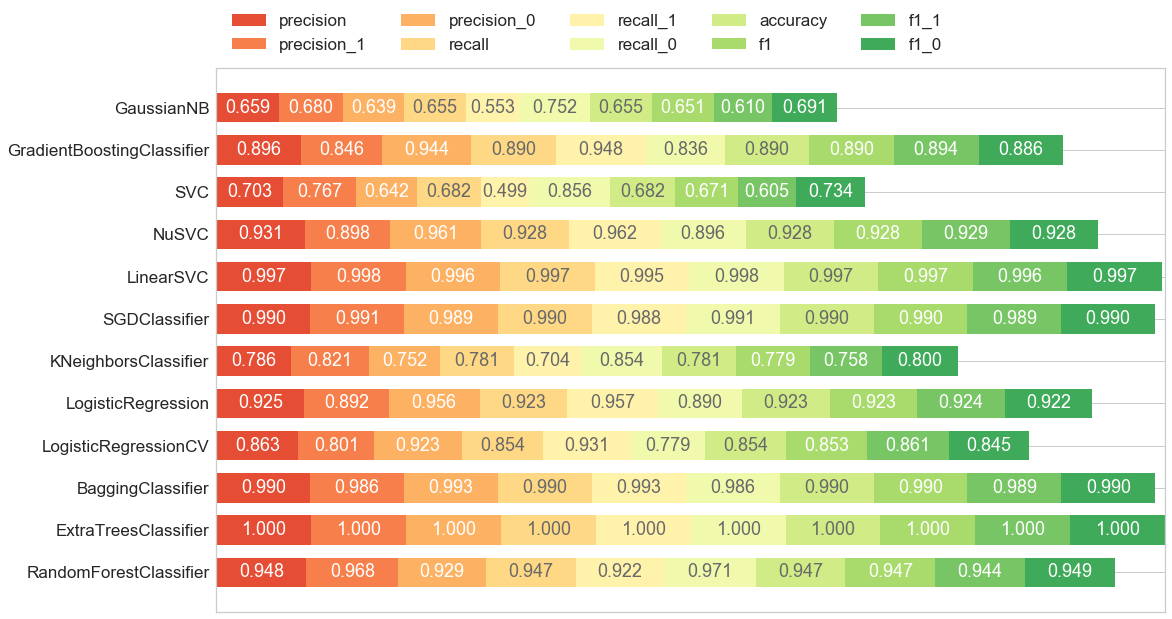

In [52]:
category_names = ['precision',
            'precision_1',
            'precision_0',
            'recall',
            'recall_1',
            'recall_0',
            'accuracy',
            'f1',
            'f1_1',
            'f1_0']

results = model_eval.set_index('model_name').T.to_dict('list')

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(17, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.3 else 'dimgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str("%.3f" % c), ha='center', va='center', fontsize=18,
                    color=text_color)
            
    ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=17)

    plt.yticks(fontsize=17, rotation=0)
    
    return fig, ax


survey(results, category_names)
plt.show()

# Classification Report for All Models

Print out a classification report for all the models

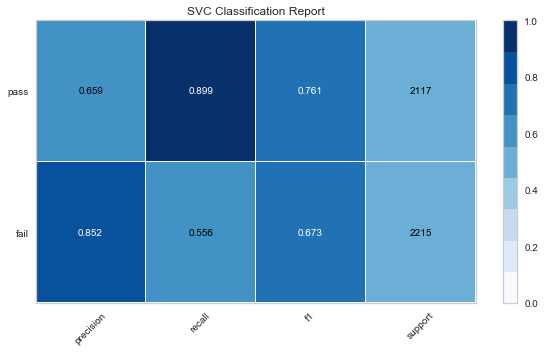

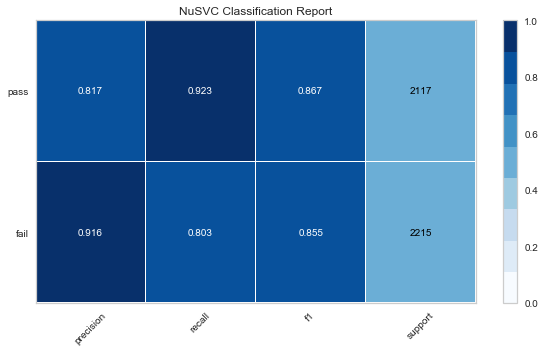

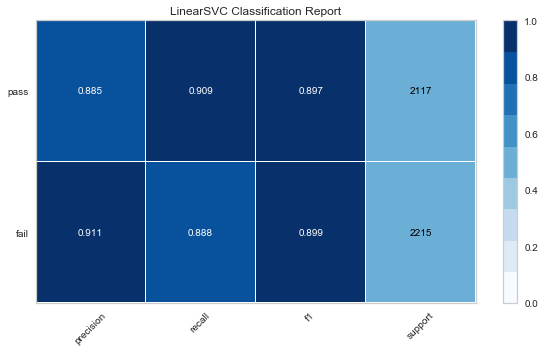

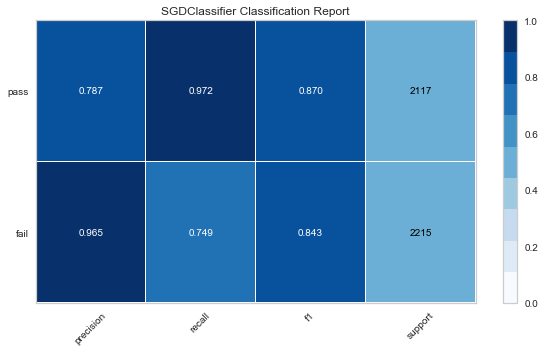

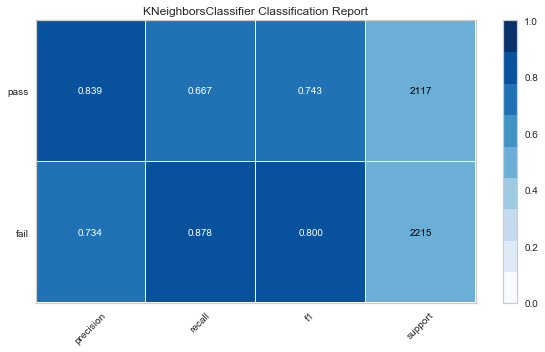

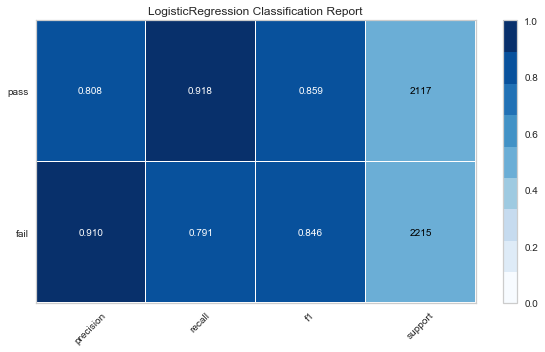

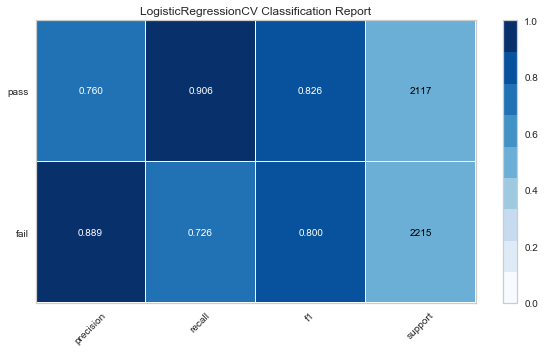

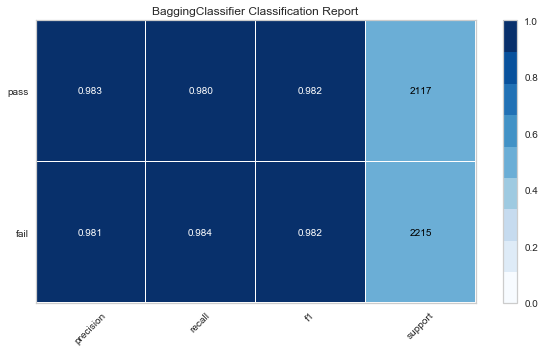

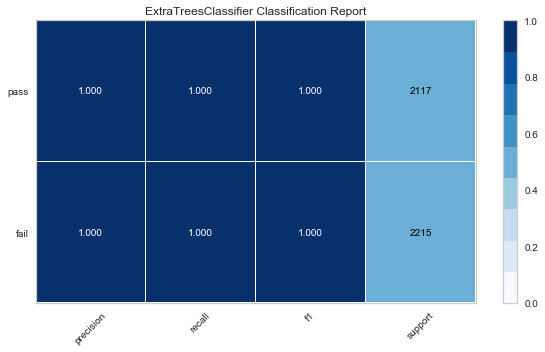

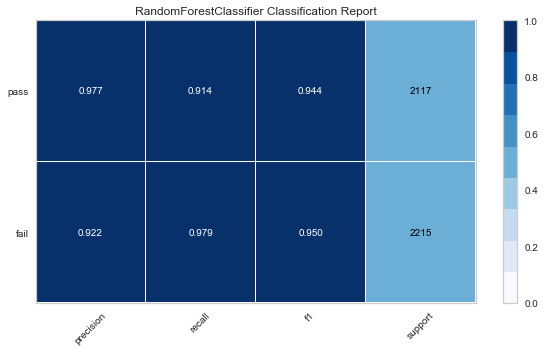

In [53]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder(categories = 'auto')), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['fail', 'pass'], 
        cmap="Blues", size=(600, 360), support=True
    )
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

In [54]:
X = train[['Scotland',
            'East Anglian Region',
            'London Region',
            'South Region',
            'North Western Region',
            'West Midlands Region',
            'South West Region',
            'East Midlands Region',
            'South East Region',
            'Wales',
            'Yorkshire Region',
            'North Region',
            'Ireland', 
            'module_presentation_length',
            'date_registration', 
            'disability', 
            'gender', 
            'age_band',
            'highest_education', 
            'imd_band', 
            'studied_credits', 
            'b4_sum_clicks', 
            'half_sum_clicks']]
y = train['final_result']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
log_reg = lr.fit(X_train, y_train)

# Cross Validation

Run through our top models with cross validation

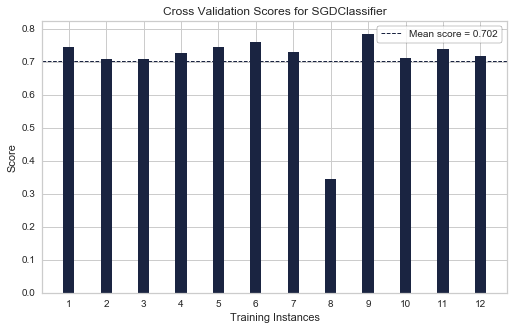

In [55]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = SGDClassifier()
visualizer = CVScores(model, cv=cv, size=(600, 360), scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

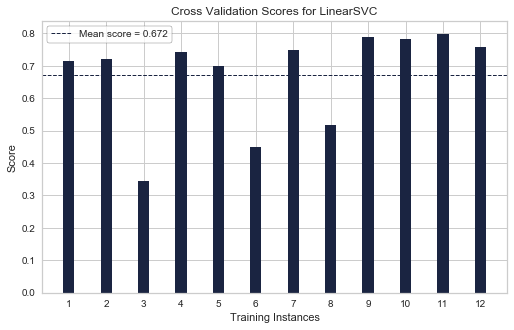

In [56]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LinearSVC()
visualizer = CVScores(model, cv=cv, size=(600, 360), scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

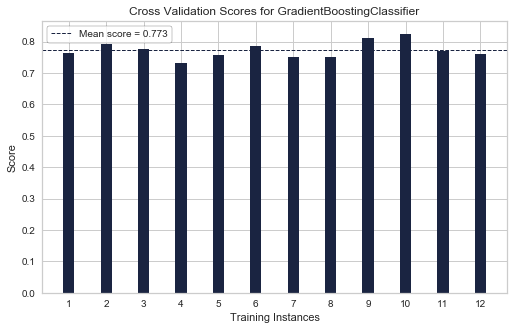

In [57]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = GradientBoostingClassifier()
visualizer = CVScores(model, cv=cv, size=(600, 360), scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

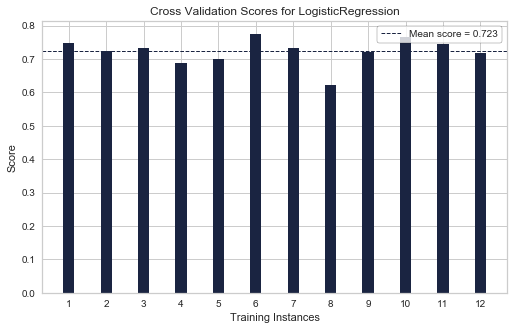

In [58]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='lbfgs')
visualizer = CVScores(model, cv=cv, size=(600, 360), scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [59]:
%pwd

'/Users/lisaschreiber/Desktop'

In [60]:
#analyse scores
model_eval = model_eval.transpose()

In [61]:
model_eval.to_excel("test_socialsciences.xlsx")